In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [50]:
# PREPARE THE DATA 

In [51]:
Myopia_data_df = pd.read_csv("Myopia_data.csv")
Myopia_data_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [52]:
Myopia_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [53]:
Myopia_data_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [54]:
# Remove the "MYOPIC" column from the dataset
Myopia_data_df.drop(['MYOPIC'], axis=1, inplace=True)

In [55]:
Myopia_data_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [56]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Myopia_data_df)

In [57]:
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [58]:
# APPLY DIMENSIONALITY REDUCTION

In [59]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction with PCA using PCA(n_components=0.99)
pca = PCA(n_components=0.99)
Myopia_data_pca= pca.fit_transform(X_scaled)
Myopia_data_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386,
       -1.3891124 , -0.57490916])

In [60]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(Myopia_data_pca)

C:\Users\debor\.conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [61]:
tsne_features.shape

(618, 2)

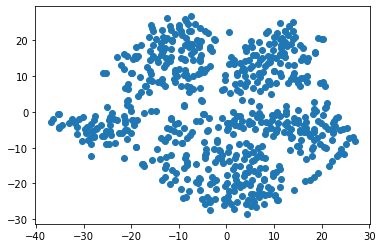

In [62]:
# Scatter plot for TSNE output. 
plt.scatter(tsne_features[:,0],tsne_features[:,1])

In [ ]:
# Are there distinct clusters?
We can notice that the clusters are evenly distributed.

In [63]:
# PERFORM A CLUSTER ANALYSIS WITH K-MEANS

In [64]:
# for loop to determine the inertia for each k between 1 through 10
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Myopia_data_pca)
    inertia.append(km.inertia_)   
Elbow = {"k": k, "inertia": inertia}
df_Elbow = pd.DataFrame(Elbow)
df_Elbow.head()

C:\Users\debor\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,8651.990482
1,2,7497.105614
2,3,6732.085949
3,4,6362.276551
4,5,6083.170887


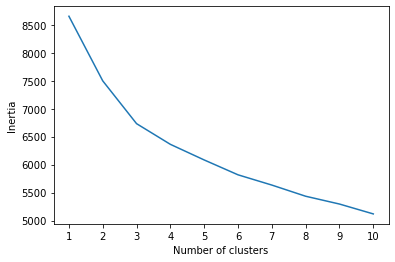

In [65]:
# Elbow Plot
plt.plot(df_Elbow['k'], df_Elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# MAKE RECOMMENDATIONS

The optimal number of clusters is 3 and TSNE wasn't the best method to find clusters.
I recommend more testing to have accurate predictions.